**Import Data**

In [1]:
# import appropriate packages
import numpy as np
import pandas as pd

In [2]:
# read the excel file
# had to install the xlrd package to read the file 
df = pd.read_excel("Competition1_raw_data.xlsx")
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


**Examining the DataFrame**

In [3]:
# exmaining the columns
# know that this is not entirely accurate because the missing values are represented by "-" not NaN
# we can see that all the dtypes are objects 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null object
P(H)       682 non-null object
P(L)       682 non-null object
P(1Day)    682 non-null object
C1         682 non-null object
C2         682 non-null object
C3         682 non-null object
C4         682 non-null object
C5         682 non-null object
C6         682 non-null object
C7         682 non-null object
T1         682 non-null object
T2         682 non-null object
T3         682 non-null object
T4         682 non-null object
T5         682 non-null object
S1         682 non-null object
S2         682 non-null object
S3         682 non-null object
dtypes: object(22)
memory usage: 117.3+ KB


In [4]:
# loooking for missing values
print(df.isnull().sum(axis=0).tolist())

# again, we know this output is not entirely accurate 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# replace '-' with NaN
df.replace(to_replace='-', value=np.nan, inplace=True)
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [6]:
# get df info again 
# see that we have more accurate counts of non null entries and data types have been changed to float64 for approproate columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [7]:
# count of number of missing records in each column
val = []
for col in df.columns:
    val.append(df[df.columns].isnull().sum())
    break
print(val)

# now we know how many values are missing in each column

[I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64]


**Descriptive Stats - Before Imputation**

In [8]:
## descriptive stats on the df before imputation 
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [9]:
# median of each column
df.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

**Visual EDA of variables before Imputation**

In [10]:
# Show distribution of all variables to identify if normalization & standardization is needed 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

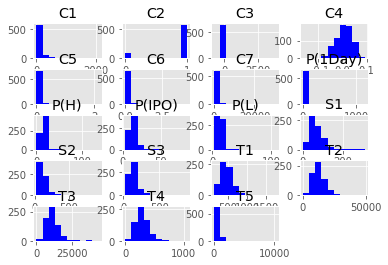

In [11]:
# may help to identify which variables need to be normalized 
for col in df.columns:
    df.hist(color='blue')
    break
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


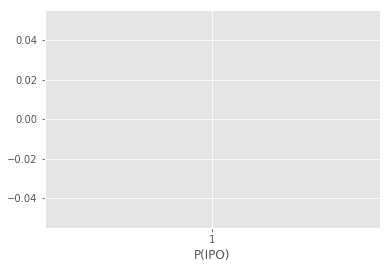

In [12]:
plt.boxplot(df['P(IPO)'])
plt.xlabel('P(IPO)')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


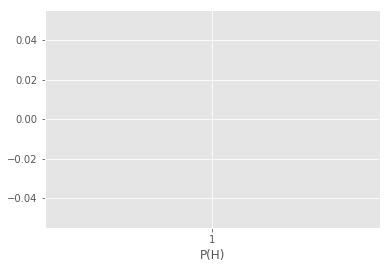

In [13]:
plt.boxplot(df['P(H)'])
plt.xlabel('P(H)')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


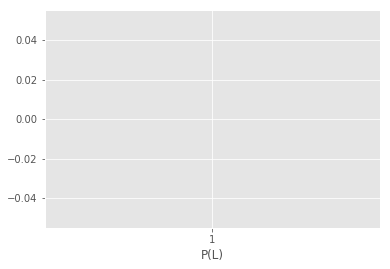

In [14]:
plt.boxplot(df['P(L)'])
plt.xlabel('P(L)')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


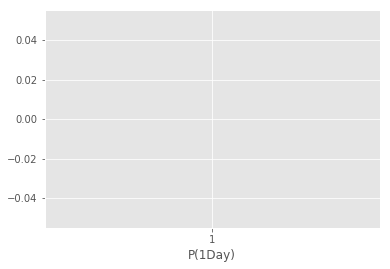

In [15]:
plt.boxplot(df['P(1Day)'])
plt.xlabel('P(1Day)')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


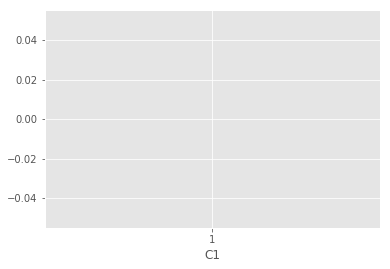

In [16]:
plt.boxplot(df['C1'])
plt.xlabel('C1')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


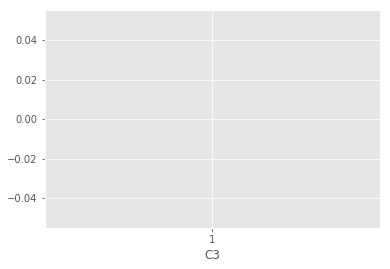

In [17]:
plt.boxplot(df['C3'])
plt.xlabel('C3')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


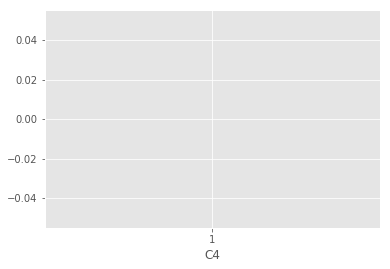

In [18]:
plt.boxplot(df['C4'])
plt.xlabel('C4')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


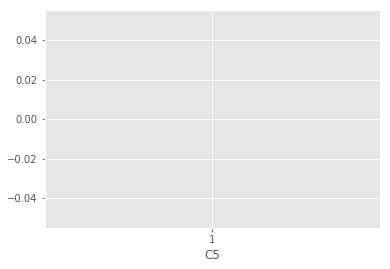

In [19]:
plt.boxplot(df['C5'])
plt.xlabel('C5')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


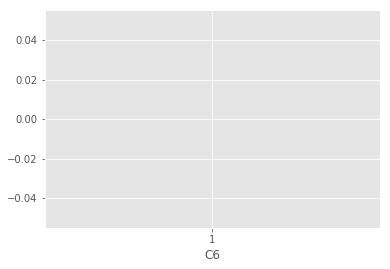

In [20]:
plt.boxplot(df['C6'])
plt.xlabel('C6')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


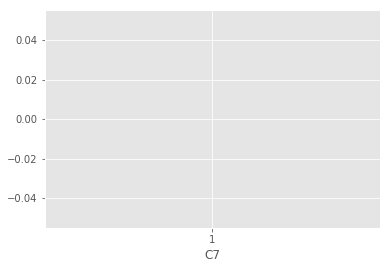

In [21]:
plt.boxplot(df['C7'])
plt.xlabel('C7')
plt.show()

**Imputation**

In [22]:
# replace null value with mean because we have continuous variables 
# does not take into account that C2 is a binary variable > how to fix that? 
# also doesn't do anything for I3 > taken care of later 
for value in df.columns:
    df.fillna(df.mean(), inplace=True)
print(df.isnull().sum(axis=0).tolist())

[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
# just checking that the values were replaced 
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345000,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936000,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378000,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526000,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298000,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591000,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146000,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,500.459962,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600000,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008000,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


**Decriptive Stats - After Imputation**

In [24]:
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.342521,158.308600,0.032775,1.039156e+08,2.501761e+07,1558.767222,175.612567,5445.641920,4836.115518,121.443374,472.566975,39.067810,84.766654,69.225403
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9195.750000,8168.000000,213.250000,462.250000,45.000000,73.000000,100.000000
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.070000,0.007282,2.759165e+07,7.500000e+06,134.738000,444.500000,12047.000000,10789.000000,279.500000,624.500000,60.000000,100.500000,134.000000
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.600000,0.030941,4.938184e+07,1.208721e+07,500.459962,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.750000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [25]:
df.median()

P(IPO)     1.350000e+01
P(H)       1.548119e+01
P(L)       1.300000e+01
P(1Day)    1.500000e+01
C1         1.100000e+02
C2         1.000000e+00
C3         7.000000e-02
C4         7.282201e-03
C5         2.759165e+07
C6         7.500000e+06
C7         1.347380e+02
T1         4.445000e+02
T2         1.204700e+04
T3         1.078900e+04
T4         2.795000e+02
T5         6.245000e+02
S1         6.000000e+01
S2         1.005000e+02
S3         1.340000e+02
dtype: float64

**Add New Columns**

In [26]:
# calculate P(mid)
df['P(mid)'] = (df['P(H)']+df['P(L)'])/2
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(mid)
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,9.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,9.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,13.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,15.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,20.0


In [27]:
# add new columns Y1, Y2, C3', C5', C6' using np.where
# tried doing this with a for loop - didn't work 
# columns also created in Alex's notebook for normalization 

df['Y1'] = np.where(df['P(IPO)']<df['P(mid)'], 1,0)
df['Y2'] = np.where(df['P(IPO)']<df['P(1Day)'], 1,0)
df['C3p'] = np.where(df['C3']<0, 1,0)
df['C5p'] = df['C5']/df['C6']
df['C6p'] = np.where(df['P(IPO)']>df['P(mid)'], (((df['P(IPO)'] - df['P(mid)']))/df['P(mid)']) * 100,0)

# check that new columns were created
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,P(mid),Y1,Y2,C3p,C5p,C6p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,690.0,62.0,117.0,139.0,9.0,0,1,0,3.864345,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,1120.0,71.0,242.0,237.0,9.0,1,0,1,12.028832,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,325.0,61.0,33.0,60.0,13.0,1,0,1,3.369134,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,509.0,80.0,59.0,110.0,15.0,1,1,1,3.299697,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,720.0,67.0,149.0,167.0,20.0,0,1,0,3.726269,5.000000


In [28]:
df.shape

(682, 28)

In [29]:
df.to_csv('csv_files/clean_data_kerry.csv')